# Curve Fitting : Computing covariance matrix and χ² for different ranges in x-axis= $ g^2 \mu \tau$ 

scipy.optimize.
curve_fit
curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)[source]

Focus on error(b), 
where b = slope for curve $y=a e^{b \sqrt{x}}$   and χ²<1



Base path /home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/ exists.
Go ahead and start plotting :) :) 


noise_type_list: ['EXP']
N_list: [256]
alpha_list: [0.1, 0.01, 0.001, 0.0001, 1e-05]
mnoise_list: [0.5]

Possible values of minimum x, x_min: 
 [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]

Possible values of maximum x, x_max: 
 [ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245 250 255 260 265 270 275 280 285 290 295 300]


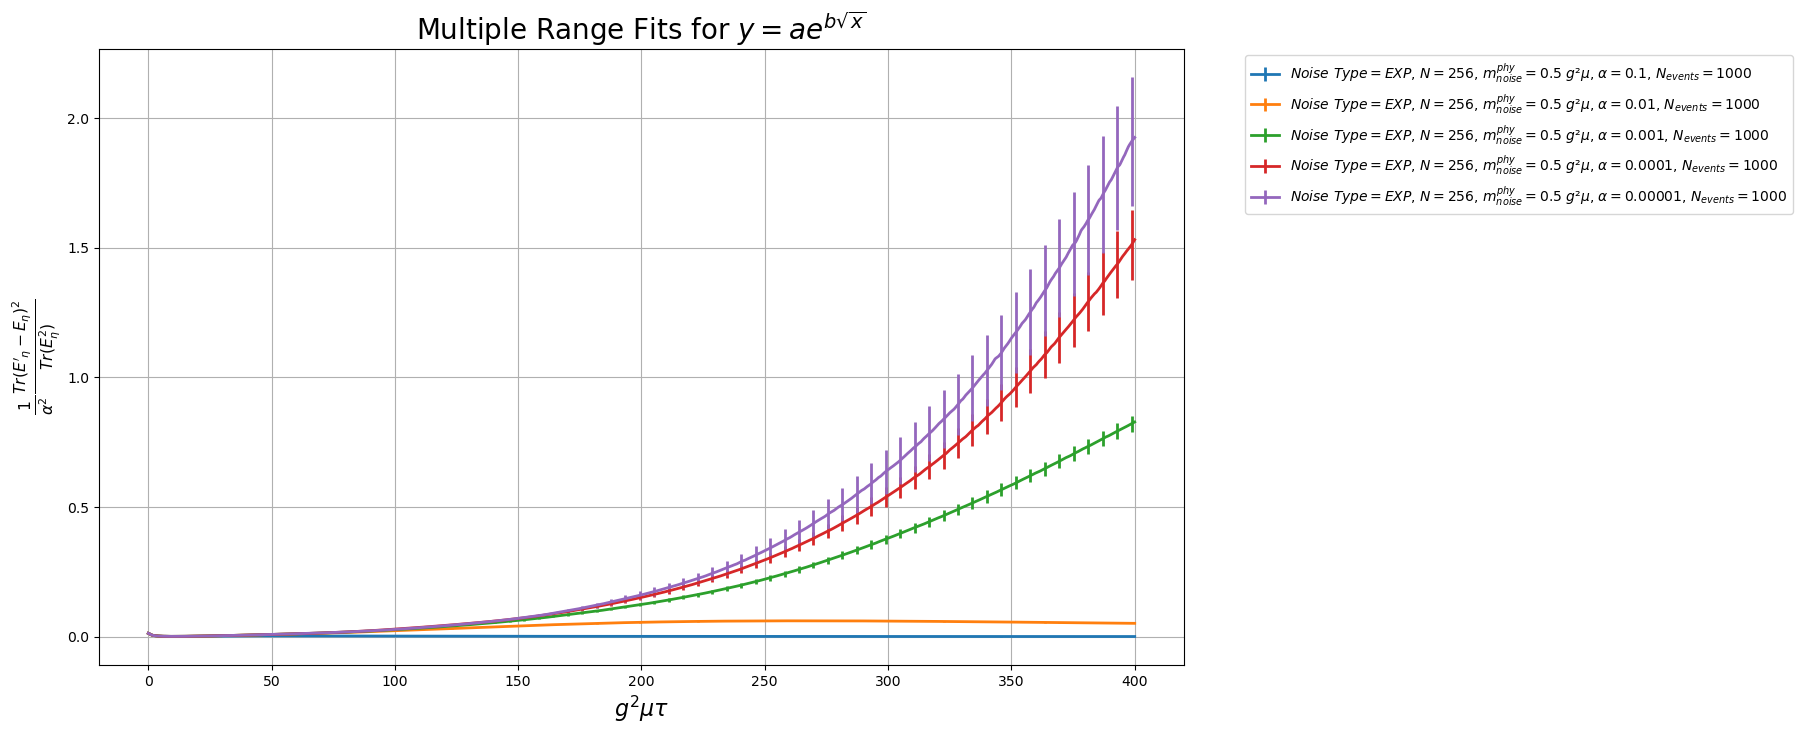

In [2]:
""" ========================================== 18 May 2025 ========================================== """

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit



# +++++++++++++++++++++++++++++++++++++++++++ Initializing the base path  +++++++++++++++++++++++++++++++++++++++++++ #
#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents100/"                                          # Base directory
base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/"                                          # Base directory

#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents500/"                                          # Base directory


# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #



# =========================================== Initialzing the parameters =========================================== #
noise_type_list = ["None", "EXP", "PL"]
N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]
alpha_list = [10**(-i) for i in range(1, 6)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05]
mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1
N_events = 1000 

"""  
print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
"""

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
noise_type_list = ["EXP"]
N_list = [256]
mnoise_list = [0.5 ]                                      # 0.1, 0.5, 1.0 
#alpha_list = [ 0.001, 0.01 ]                                        # 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0002                                                                        
N_events = 1000



print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
# ======================================================================================================================= #



# +++++++++++++++++++++++++++++++++++++++++++++ Define Exponential Function +++++++++++++++++++++++++++++++++++++++++++++ #
def exponential_fit(x, a, b):                                   # a: Initial amplitude     # b: Growth rate
    y = a * np.exp(b * x)
    return y

def exponential_fit_customized(x, a, b):
    x = np.sqrt(x)
    y = a * np.exp(b * x)
    return y
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #



# Define the ranges to test
x_min = np.arange(5, 101, 5)                                # [5, 10, ..., 95, 100]
x_max = np.arange(50, 301, 5)                               # [50, 55, ..., 300]


#x_min = np.arange(5, 51, 10)  # [5, 10, ..., 50]
#x_max = np.arange(100, 301, 20)  # [50, 60, ..., 300]


print("\nPossible values of minimum x, x_min: \n", x_min)
print("\nPossible values of maximum x, x_max: \n", x_max)


# Create a table to store results
results_table = []

# ================================================ Plotting and Fitting ================================================ #
plt.figure(figsize=(14, 8))

for noise_type in noise_type_list:
        for N in N_list:
            for mnoise in mnoise_list:
                for alpha in alpha_list:

                   
                    
                    noise_type_str = noise_type
                    mnoise_str = f"{mnoise:.1f}" 
                    alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')
                   
                    #print("alpha_str:", alpha_str)
                    #print("mnoise_str:", mnoise_str)
                    #print("noise_type_str:", noise_type_str)


                    data_filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                    filename_with_path = os.path.join(base_path, data_filename)
                    
                    #print("data_filename:", data_filename)
                    #print("filename_with_path:", filename_with_path)
                   

                    # Check if the file exists
                    if not os.path.exists(filename_with_path):
                        print(f"File {filename_with_path} does not exist. Skipping...")
                        continue


                    else:
                        #print(f"File {filename_with_path} exists. Proceeding to read the data...\n")
                       
                        df1 = pd.read_csv(filename_with_path)
                        x_data = df1["tau"]
                        y_data = df1["diff_Eetaalpha2"]
                        y_error = df1["diff_Eetaalpha2_error"]              # Standard errors = sigma/sqrt(N)

                        
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Plot data !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

                        #plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
                        #plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)

                        plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $\alpha = {alpha_str}$, $N_{{events}} = {N_events}$"
                        plt.errorbar(x_data, y_data, y_error, label=plot_label,  errorevery=100,  linewidth=2)#, capsize=3, capthick=1)

                        
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Perform exponential fit !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

                                    # p0=[a,b]: Initial guess for parameters (a, b). If the fit fails, adjust p0
                                    # Example: a ≈ y[0], b ≈ negative (growing trend)

                                    # fitted_parameters: An array of fitted parameters [a, b].
                                    # maxfev: Maximum number of function evaluations (helps avoid convergence errors).
                                    # sigma =y_err_fit: se errors for weighted fit


                                    # sigma = y_error,  # Optional: Weight fit by errors
                                    # absolute_sigma = True  # Treat errors as absolute

                                    # Perform the fit (weight by errors if needed)
                                    # fitted_parameters, covariance_matrix = curve_fit( model, x, y, p0=p0, sigma = y_error,  absolute_sigma=True)  # Treat errors as absolute
                                    # a, b = fitted_parameters
                                    # A_err, B_err = np.sqrt(np.diag(covariance_matrix))  # Standard errors


                                    # Filter data in current range using mask
                                    # A mask is a boolean array (containing True/False values) that has the same length as your data arrays (x_data, y_data, etc.). 
                                    # It identifies which elements meet a condition (e.g., x_data within [x_min_fit, x_max_fit]).


                                    # fitted_parameters, covariance_matrix = curve_fit( exponential_fit_customized, x_data, y_data, maxfev=5000, p0=p0, sigma=y_error, absolute_sigma=True)
                        

                        





                        # ******************************************** Fitting for limited data ******************************************** #
                        # ****************************************************************************************************************** #


                        # Test all range combinations
                        for x_min_fit in x_min:
                            for x_max_fit in x_max:

                                if x_min_fit >= x_max_fit:  # Skip invalid ranges
                                    continue
                            
                                # Filter data in current range using mask 
                                mask = (x_data >= x_min_fit) & (x_data <= x_max_fit)                            
                                x_fit = x_data[mask]
                                y_fit = y_data[mask]
                                y_error_fit = y_error[mask]

                                sigma = y_error_fit
                                p0 = [0.0004, 0.01]  

                                # Perform the fit on the filtered data
                                fitted_parameters, covariance_matrix = curve_fit(exponential_fit_customized, x_fit, y_fit, p0=p0, maxfev=50000, sigma=sigma, absolute_sigma=True)
                                a, b = fitted_parameters                                                            # Get optimal parameters for fitting
                                a_error, b_error = np.sqrt(np.diag(covariance_matrix))                              # Standard errors for parameters a and b


                                # Generate points for the fitted curve (only in the fitting range)
                                x_fit_curve = x_fit             
                                y_fit_curve = exponential_fit_customized(x_fit_curve, a, b)

                                residuals = y_fit - y_fit_curve                                 # Calculate residuals (actual_data - fitted_data)

                                chi_sq = np.sum((residuals / sigma) ** 2)                       # Compute χ²

                                # Compute reduced χ²
                                N_data_points = len(x_fit_curve)
                                N_parameters = 2                                             # 2 = No. of parameters (a,b)
                                dof = N_data_points - N_parameters    
                                reduced_chi_sq = chi_sq / dof


                                
                                # Calculate chi-squared
                                residuals = y_fit - exponential_fit_customized(x_fit, a, b)
                                chi_sq = np.sum((residuals/sigma)**2)
                                dof = len(x_fit) - 2
                                reduced_chi_sq = chi_sq/dof
                                
                                # Store results
                                results_table.append({  'alpha': alpha, 
                                                        'x_min': x_min_fit,
                                                        'x_max': x_max_fit,
                                                        'a': a,
                                                        'a_error': a_error,
                                                        'b': b,
                                                        'b_error': b_error,
                                                        'chi_sq': chi_sq,
                                                        'reduced_chi_sq': reduced_chi_sq   })
                            
                                
                               
                                            # Plot the fitted curve (only in fitting range)
                                #label_fit = rf"$\alpha = {alpha_str}$, Fit($x \in [{x_min_fit}, {x_max_fit}]$):  $y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$"
                                label_fit = (rf"$\alpha = {alpha_str}$, Fit($x \in [{x_min_fit}, {x_max_fit}]$): "  rf"$y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$" + "\n" +    
                                            rf"$\chi^2/\mathrm{{dof}} = {reduced_chi_sq:.5f}$")

                                
                                #plt.plot(x_fit_curve, y_fit_curve, 'r--', label=label_fit,  linewidth=4)

                               
                                """
                                print("\n +++++++++++++++++++++++++++++++++++++++++ Curve fitting for alpha = ", alpha, "+++++++++++++++++++++++++++++++++++++++++")
                                # Print fit results
                                print(f"For alpha={alpha_str}, x: g²μτ =[{x_min_fit}, {x_max_fit}], fitted parameters for customized exponential fit (a, b): {a:.5f}, {b:.5f}")

                                print("No. of data points to be fitted =", N_data_points)                       
                                print("Degrees of Freedom (DoF)        =", dof, "\n")

                                print(f"Fitted parameters ({x_min_fit} ≤ x ≤ {x_max_fit}):")
                                print(f"a = {a:.5e} ± {a_error:.5e}")
                                print(f"b = {b:.5f} ± {b_error:.5f}")

                                print(f"\nχ²         = {chi_sq:.5f}")
                                print(f"Reduced χ² = {reduced_chi_sq:.5f}")

                                print("\ncovariance matrix: \n", covariance_matrix)
                                print(" +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")

                                
                                """


                                # ****************************************************************************************************************** #
                                # ****************************************************************************************************************** #

                        
                        #plt.xlim(0.0, 200)                                                                                                    
                        #plt.ylim(0., 0.2)

                        

                                   
                                                                                                         
                        #plt.legend()
                       # plt.grid(True)
                        #plt.tight_layout()






# Format the plot
plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
plt.ylabel(r"$\frac{1}{\alpha^2} \frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)}$", fontsize=16)
plt.title(r"Multiple Range Fits for $y = a e^{b\sqrt{x}}$", fontsize=20)

#plt.xlim(0, 300)
#plt.ylim(0, 0.2)

#plt.yscale('log')
#plt.xlim(0.0, 300)                                                                                                    
#plt.ylim(0.00004, 0.0089)
                    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.tight_layout()

# Save the plot
#plt.savefig(f"Plot_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}_multiple_range_fits.png", dpi=300, bbox_inches='tight')
#plt.savefig(f"Plot_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}_multiple_range_fits.png", dpi=300, bbox_inches='tight')
#plt.savefig(f"Plot_Noise{noise_type_str}_N{N}_Nevents{N_events}_multiple_range_fits.png", dpi=300, bbox_inches='tight')

#plt.show()



# Create and display results table
results_df = pd.DataFrame(results_table)

columns_order = ["alpha", "x_min", "x_max", "a", "a_error", "b", "b_error", "chi_sq", "reduced_chi_sq", "b_error"]

"""
print("\nResults Table 1: \n")
print( results_df[columns_order].to_string ( index=False,  justify='center',  float_format="{:,.4e}".format ) )     # Print the DataFrame with clean alignment

print("\nResults Table 2: \n")
print(results_df[['alpha', 'x_min', 'x_max', 'a',  'a_error', 'b', 'b_error', 'chi_sq', 'reduced_chi_sq', 'b_error']].to_string(index=False,  justify='center'))
"""



# Save to a csv file
#results_df.to_csv(f"Data_Fit_results_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.csv", index = False, header = True, float_format="%.6e")                   


# Save to a text file (not CSV)
formatted_output = results_df.to_string(   index=False,  justify='center',  col_space=15)#,  float_format="%.4e"   )
with open(f"Data_Fit_results_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.txt", "w") as f:
    f.write(formatted_output)




# +++++++++++++++++++++++++    Interpreting χ² :    +++++++++++++++++++++++++
#   χ² ≈ dof    (reduced χ² ≈ 1):       Good fit (model matches data within uncertainties).
#   χ² ≫ dof    (reduced χ² ≫ 1):       Poor fit (underestimated errors or incorrect model).
#   χ² ≪ dof    (reduced χ² ≪ 1):       Overestimated errors or overfitting.


    # index = True/False :                      Show/Hide row numbers
    # header = True/False :                     Show/hide column names
    # justify ='center' :                       Center-align columns
    # float_format = "{:,.4e}".format           Scientific notation with 4 decimals
                                                                                                                                                    # col_space = 15 :                          Add 15 spaces between columns


In [7]:
#  keep only statistically acceptable fits for which χ² < 1.0
acceptable_fits_ChiSq= results_df[results_df["reduced_chi_sq"] < 1.0].copy()

print("Acceptable fits for which χ² < 1.0 : \n")
#print(acceptable_fits_ChiSq[columns_order].to_string(index=False,  justify='center'))#, float_format="{:,.4e}".format))    

if acceptable_fits_ChiSq.empty:
    print("No fits have reduced χ² < 1.0 !!! \nThink what to do now :( ")
else:

    best_fits = (acceptable_fits_ChiSq.sort_values(["alpha", "b_error"]))   
    print("\n\nSorting of acceptable fits for which χ² < 1.0 : \n")
    #print(best_fits[columns_order].to_string(index=False,  justify='center'))#, float_format="{:,.4e}".format)) 

    best_fits = best_fits.groupby("alpha", as_index=False).first()
    print("\n\nBest fits (reduced χ² < 1 & min b_error) :\n")
    print(best_fits[columns_order].to_string(index=False,  justify='center'))#, float_format="{:,.4e}".format)) 


    # write a separate csv file with name "Best_fits_Noise....."
    #best_fits.to_csv(f"Data_Best_fits_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.csv", index = False, header = True, float_format="%.6e")                   

    # Save to a text file
    formatted_output = best_fits.to_string(   index=False,  justify='center',  col_space=15)#,  float_format="%.4e"   )
    with open(f"Data_Best_fits_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.txt", "w") as f:
        f.write(formatted_output)




    # .sort_values : smallest b_error first for each alpha
    # The DataFrame acceptable is ordered primarily by α, secondarily by b_error (ascending by default). 
    # After this step, for every value of α, the row with the smallest b_error appears first in its block.

    # .groupby : Rows are then grouped by the alpha column. Each group now contains all fits that share the same α. 
    # Setting as_index=False keeps alpha as a regular column in the output, rather than turning it into the index.
    # .first() : Within each group, take the very first row—which, is the one with the smallest b_error for that α. 
    # The result is a new DataFrame, best_fits, containing one “best” fit per α (all satisfy reduced_chi_sq < 1 and have the minimal uncertainty on b within their α-group).


Acceptable fits for which χ² < 1.0 : 



Sorting of acceptable fits for which χ² < 1.0 : 



Best fits (reduced χ² < 1 & min b_error) :

  alpha  x_min  x_max     a       a_error        b     b_error    chi_sq    reduced_chi_sq  b_error
0.00001   35    300   0.000435 7.957382e-07  0.417734 0.000211 1945.181576     0.430540    0.000211
0.00010   35    300   0.000449 6.355573e-07  0.411892 0.000156 1929.725044     0.427119    0.000156
0.00100   40    300   0.000595 8.558824e-07  0.376360 0.000137 4064.718541     0.916923    0.000137
0.01000   45    125   0.000751 2.232614e-06  0.341033 0.000335 1046.403836     0.767721    0.000335
0.10000   75    165   0.010971 9.499154e-06 -0.163630 0.000078 1510.940835     0.985610    0.000078


0.1 75.0 165.0 0.9856104598864662
0.01 45.0 125.0 0.767721083068088
0.001 40.0 300.0 0.9169227478373699
0.0001 35.0 300.0 0.4271193102718757
1e-05 35.0 300.0 0.43054041087984074


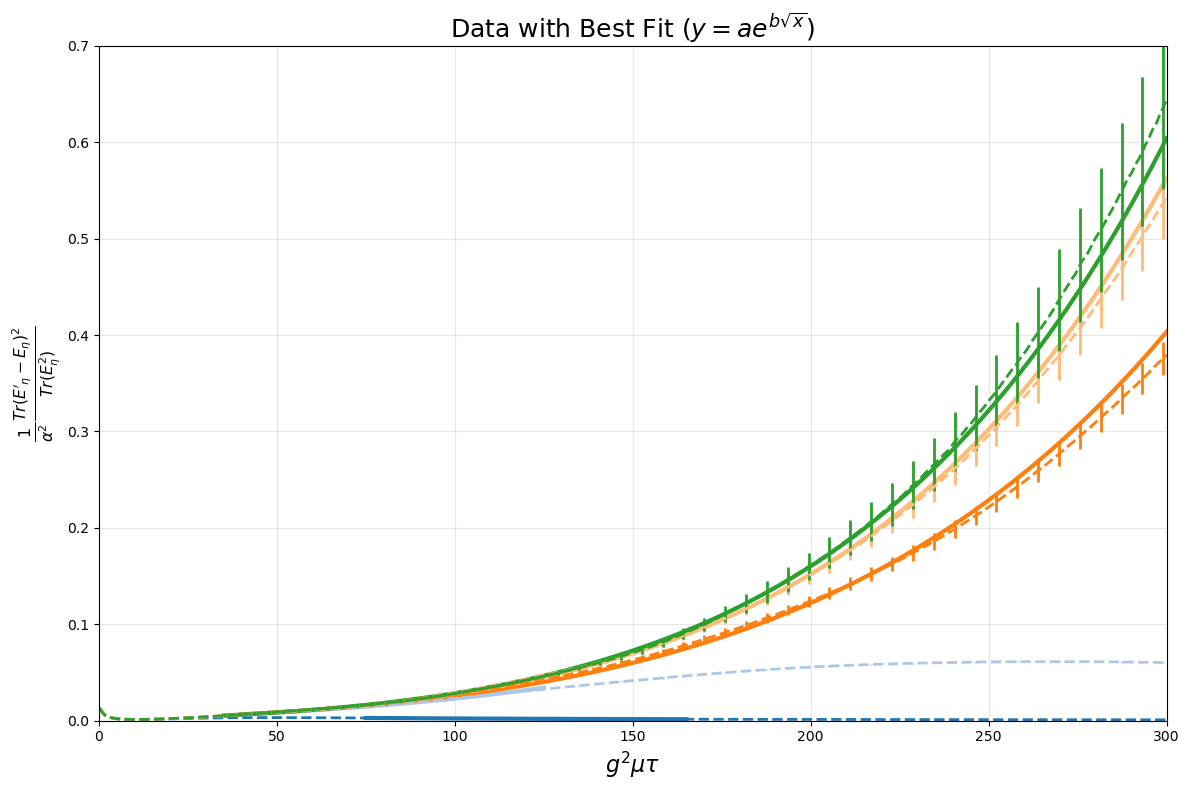

In [12]:
# ================================================ Plotting Original Data with Best Fit ================================================ #

"""
#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
noise_type_list = ["EXP"]
N_list = [256]
mnoise_list = [0.1 ]                                      # 0.1, 0.5, 1.0 
alpha_list = [ 0.001, 0.01 ]                                        # 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0002                                                                        
N_events = 1000
"""

#alpha_list = [ 0.1, 0.01, 0.001, 0.0001, 0.00001 ]                                        # 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0002                                                                        







plt.figure(figsize=(12, 8))

# Define a color cycle for different parameter sets
colors = plt.cm.tab20.colors                            # Using matplotlib's default color cycle
color_index = 0
#print("colors :\n", colors)

# Custom styling parameters
Line_style_Original = '--'           # Dashed line for original data
Line_width_Original = 2             # Line width for original data
Line_style_Fit = '-'               #  Solid line for best fit
Line_width_Fit = 3                  # Thicker line for best fit
Error_every = 100                   # Show error bars every N points

for noise_type in noise_type_list:
    for N in N_list:
        for mnoise in mnoise_list:
            for alpha in alpha_list:

                noise_type_str = noise_type
                mnoise_str = f"{mnoise:.1f}" 
                alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')


                # Get color for this parameter set
                current_color = colors[color_index % len(colors)]
                color_index += 1
                


                data_filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                filename_with_path = os.path.join(base_path, data_filename)
                    
                    #print("data_filename:", data_filename)
                    #print("filename_with_path:", filename_with_path)
                   

                # Check if the file exists
                if not os.path.exists(filename_with_path):
                    print(f"File {filename_with_path} does not exist. Skipping...")
                    continue


          
                # Read data
                df1 = pd.read_csv(filename_with_path)
                x_data = df1["tau"]
                y_data = df1["diff_Eetaalpha2"]
                y_error = df1["diff_Eetaalpha2_error"]
                
                # Plot original data with error bars and solid line
                #plot_label = rf"Data: $\alpha={alpha_str}$"


                Plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $\alpha = {alpha_str}$, $N_{{events}} = {N_events}$"


                plt.errorbar(x_data, y_data, y_error, label=Plot_label, errorevery=Error_every, linestyle=Line_style_Original, linewidth=Line_width_Original,
                            color=current_color)
                try:
                    # Get best fit parameters for this configuration
                    best_fit_row = best_fits[(best_fits['alpha'] == alpha)].iloc[0]
                    a = best_fit_row['a']
                    b = best_fit_row['b']
                    x_min_fit = best_fit_row['x_min']
                    x_max_fit = best_fit_row['x_max']
                    reduced_chi_sq = best_fit_row['reduced_chi_sq']
                    
                    # Generate points for the best fit curve
                    x_fit = np.linspace(x_min_fit, x_max_fit, 200)
                    y_fit = exponential_fit_customized(x_fit, a, b)

                    # Plot the best fit curve with same color but different style
                    Fit_label = rf"Fit: $y = {a:.3f}e^{{{b:.3f}\sqrt{{x}}}}$ ($\chi^2$/dof$={reduced_chi_sq:.2f}$), Fit($x \in [{x_min_fit}, {x_max_fit}]$), $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $\alpha = {alpha_str}$"
                    plt.plot(x_fit, y_fit, label=Fit_label, linestyle=Line_style_Fit, linewidth=Line_width_Fit, color=current_color)
                
                except IndexError:
                    print(f"No best fit found for alpha={alpha}")
                    continue


                        


                print(alpha, x_min_fit, x_max_fit, reduced_chi_sq)
# Format the plot
plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
plt.ylabel(r"$\frac{1}{\alpha^2} \frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)}$", fontsize=16)
plt.title(r"Data with Best Fit ($y = a e^{b\sqrt{x}}$)", fontsize=18)


plt.xlim(0.0, 300)                                                                                                    
plt.ylim(0., 0.7)



# Adjust legend and grid
#plt.legend(bbox_to_anchor=(1.05, 1), fontsize=10, loc='upper right')                # loc='upper left'
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot with high quality
output_filename = f"Plot_BestFit_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ========================== Another way of doing this check for best fit with χ² < 1.0 and minimum b_error ========================== #  
# ============================================================================================================================ #

# Convert results_table to DataFrame
results_df = pd.DataFrame(results_table)

# Group the results by alpha
best_fits_per_alpha = []

for alpha_val, group in results_df.groupby('alpha'):
    # Filter rows with reduced chi² <= 1
    filtered_group = group[group['reduced_chi_sq'] <= 1.0]

    if filtered_group.empty:
        print(f"\nNo good fit found for alpha = {alpha_val:.5e} (reduced χ² ≤ 1)")
        continue

    # Get the fit with minimum b_error
    best_fit = filtered_group.loc[filtered_group['b_error'].idxmin()]
    best_fits_per_alpha.append(best_fit)

    print(f"\nBest Fit for alpha = {alpha_val:.5e}:")
    print(best_fit.to_string(float_format="%.5e"))

# Combine all best fits into one DataFrame
best_fits_df = pd.DataFrame(best_fits_per_alpha)

# Save results to CSV and TXT
best_fits_df.to_csv( f"Data_Best_fits_per_alpha_method2_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.csv", index=False, float_format="%.6e" )

# Also save as formatted text
formatted_output = best_fits_df.to_string(index=False, float_format="%.4e", col_space=15)
with open(f"Data_Best_fits_per_alpha_method2_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}.txt", "w") as f:
    f.write(formatted_output)



Best Fit for alpha = 1.00000e-05:
alpha            1.00000e-05
x_min            3.50000e+01
x_max            3.00000e+02
a                4.35436e-04
a_error          7.95738e-07
b                4.17734e-01
b_error          2.11142e-04
chi_sq           1.94518e+03
reduced_chi_sq   4.30540e-01

Best Fit for alpha = 1.00000e-04:
alpha            1.00000e-04
x_min            3.50000e+01
x_max            3.00000e+02
a                4.48851e-04
a_error          6.35557e-07
b                4.11892e-01
b_error          1.55907e-04
chi_sq           1.92973e+03
reduced_chi_sq   4.27119e-01

Best Fit for alpha = 1.00000e-03:
alpha            1.00000e-03
x_min            4.00000e+01
x_max            3.00000e+02
a                5.95312e-04
a_error          8.55882e-07
b                3.76360e-01
b_error          1.36649e-04
chi_sq           4.06472e+03
reduced_chi_sq   9.16923e-01

Best Fit for alpha = 1.00000e-02:
alpha            1.00000e-02
x_min            4.50000e+01
x_max            1.